In [21]:
import os, shutil
train_dir = 'train'
validation_dir = 'train3'
test_dir = 'test'
train_airplane_dir = 'train/000_airplane'
train_automobile_dir = 'train/001_automobile'
train_bird_dir = 'train/002_bird'
train_cat_dir = 'train/003_cat'
train_deer_dir = 'train/004_deer'
train_dog_dir = 'train/005_dog'
train_frog_dir = 'train/006_frog'
train_horse_dir = 'train/007_horse'
train_ship_dir = 'train/008_ship'
train_truck_dir = 'train/009_truck'
val_airplane_dir = 'train3/000_airplane'
val_automobile_dir = 'train3/001_automobile'
val_bird_dir = 'train3/002_bird'
val_cat_dir = 'train3/003_cat'
val_deer_dir = 'train3/004_deer'
val_dog_dir = 'train3/005_dog'
val_frog_dir = 'train3/006_frog'
val_horse_dir = 'train3/007_horse'
val_ship_dir = 'train3/008_ship'
val_truck_dir = 'train3/009_truck'
test_airplane_dir = 'test/test/000_airplane'
test_automobile_dir = 'test/test/001_automobile'
test_bird_dir = 'test/test/002_bird'
test_cat_dir = 'test/test/003_cat'
test_deer_dir = 'test/test/004_deer'
test_dog_dir = 'test/test/005_dog'
test_frog_dir = 'test/test/006_frog'
test_horse_dir = 'test/test/007_horse'
test_ship_dir = 'test/test/008_ship'
test_truck_dir = 'test/test/009_truck'
print('total training airplane images:', len(os.listdir(train_airplane_dir)))
print('total training automobile images:', len(os.listdir(train_automobile_dir)))
print('total training bird images:', len(os.listdir(train_bird_dir)))
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training deer images:', len(os.listdir(train_deer_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total training frog images:', len(os.listdir(train_frog_dir)))
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training ship images:', len(os.listdir(train_ship_dir)))
print('total training truck images:', len(os.listdir(train_truck_dir)))
print('total validation airplane images:', len(os.listdir(val_airplane_dir)))
print('total validation automobile images:', len(os.listdir(val_automobile_dir)))
print('total validation bird images:', len(os.listdir(val_bird_dir)))
print('total validation cat images:', len(os.listdir(val_cat_dir)))
print('total validation deer images:', len(os.listdir(val_deer_dir)))
print('total validation dog images:', len(os.listdir(val_dog_dir)))
print('total validation frog images:', len(os.listdir(val_frog_dir)))
print('total validation horse images:', len(os.listdir(val_horse_dir)))
print('total validation ship images:', len(os.listdir(val_ship_dir)))
print('total validation truck images:', len(os.listdir(val_truck_dir)))
print('total testing airplane images:', len(os.listdir(test_airplane_dir)))
print('total testing automobile images:', len(os.listdir(test_automobile_dir)))
print('total testing bird images:', len(os.listdir(test_bird_dir)))
print('total testing cat images:', len(os.listdir(test_cat_dir)))
print('total testing deer images:', len(os.listdir(test_deer_dir)))
print('total testing dog images:', len(os.listdir(test_dog_dir)))
print('total testing frog images:', len(os.listdir(test_frog_dir)))
print('total testing horse images:', len(os.listdir(test_horse_dir)))
print('total testing ship images:', len(os.listdir(test_ship_dir)))
print('total testing truck images:', len(os.listdir(test_truck_dir)))

total training airplane images: 1005
total training automobile images: 974
total training bird images: 1032
total training cat images: 1016
total training deer images: 999
total training dog images: 937
total training frog images: 1030
total training horse images: 1001
total training ship images: 1025
total training truck images: 981
total validation airplane images: 994
total validation automobile images: 1042
total validation bird images: 965
total validation cat images: 997
total validation deer images: 990
total validation dog images: 1029
total validation frog images: 978
total validation horse images: 1015
total validation ship images: 961
total validation truck images: 1029
total testing airplane images: 1000
total testing automobile images: 1000
total testing bird images: 1000
total testing cat images: 1000
total testing deer images: 1000
total testing dog images: 1000
total testing frog images: 1000
total testing horse images: 1000
total testing ship images: 1000
total testing

Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 1 classes.


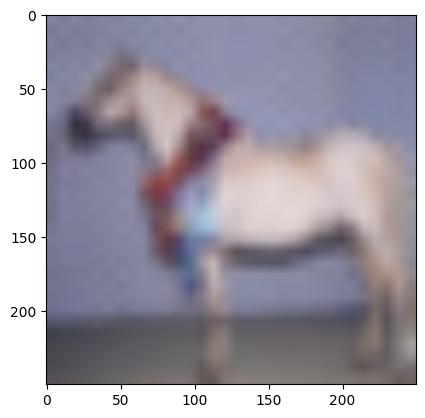

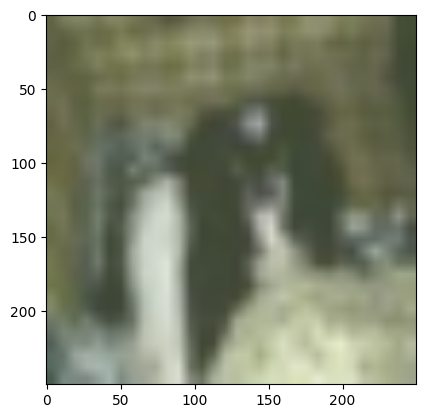

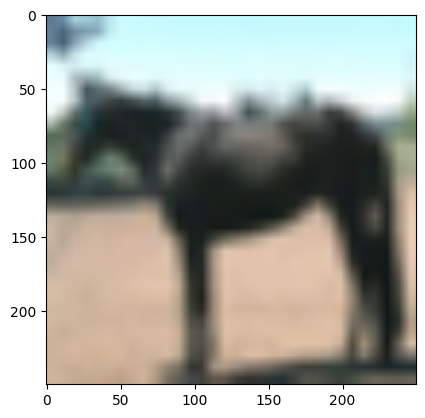

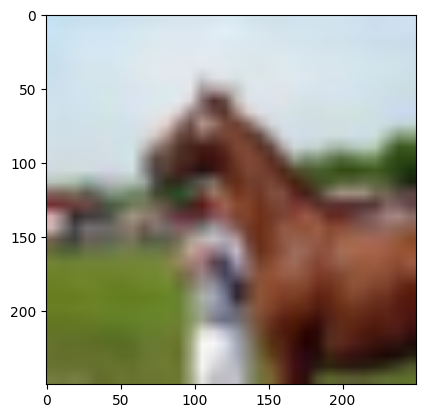

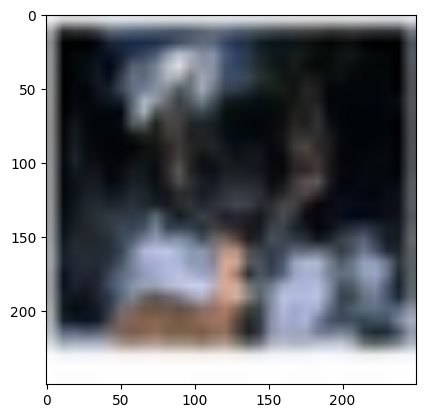

In [22]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 250
train_dataset = image_dataset_from_directory(
train_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
validation_dataset = image_dataset_from_directory(
validation_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
test_dataset = image_dataset_from_directory(
test_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
import matplotlib.pyplot as plt
for data_batch, _ in train_dataset.take(1):
  for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show()

In [23]:
from tensorflow import keras
from keras import layers
data_augmentation = keras.Sequential(
  [
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.2),
  ]
)

In [24]:
#The shape of each batch

for data_batch, labels_batch in train_dataset:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (32, 250, 250, 3)
labels batch shape: (32,)


In [25]:
#Creating the neural network
from tensorflow import keras
from keras import layers
from keras import models
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [26]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 250, 250, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 124, 124, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 61, 61, 64)        0         
 ng2D)                                                     

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath='model_checkpoint.h5', 
                                      monitor='val_loss', 
                                      save_best_only=True,
                                      save_weights_only=True,
                                      verbose=1)

early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=3,
                                        verbose=1)

In [27]:
import tensorflow as tf
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
#Training the model
#history guarda todos os parametros gerados durante o treino
history = model.fit(
  train_dataset,
  epochs=80,
  validation_data=validation_dataset,
  callbacks=[checkpoint_callback, early_stopping_callback]
  )# n usa para melhorar so para mostrar ao utilizador

Epoch 1/10
313/313 [==============================] - 407s 1s/step - loss: 1.9730 - accuracy: 0.2668 - val_loss: 1.7807 - val_accuracy: 0.3515
Epoch 2/10
313/313 [==============================] - 395s 1s/step - loss: 1.6714 - accuracy: 0.3860 - val_loss: 1.5746 - val_accuracy: 0.4151
Epoch 3/10
313/313 [==============================] - 394s 1s/step - loss: 1.5119 - accuracy: 0.4533 - val_loss: 1.4731 - val_accuracy: 0.4560
Epoch 4/10
313/313 [==============================] - 393s 1s/step - loss: 1.3834 - accuracy: 0.5010 - val_loss: 1.4248 - val_accuracy: 0.4851
Epoch 5/10
313/313 [==============================] - 391s 1s/step - loss: 1.2745 - accuracy: 0.5427 - val_loss: 1.4150 - val_accuracy: 0.4816
Epoch 6/10
313/313 [==============================] - 393s 1s/step - loss: 1.1453 - accuracy: 0.5940 - val_loss: 1.4529 - val_accuracy: 0.4950
Epoch 7/10
313/313 [==============================] - 4614s 15s/step - loss: 1.0022 - accuracy: 0.6428 - val_loss: 1.3941 - val_accuracy: 0.51

In [29]:
model.save("models/04_CNN_modelS_augmentation_10epochs.h5")

In [30]:
#como demora muito tempo vamos dar load de um test model

#Loading and testing the model
from tensorflow import keras
#model = keras.models.load_model('models/04_CNN_modelS_10epochs.h5')

val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

313/313 [==============================] - 90s 287ms/step - loss: 1.9998 - accuracy: 0.5127
val_acc: 0.5127000212669373


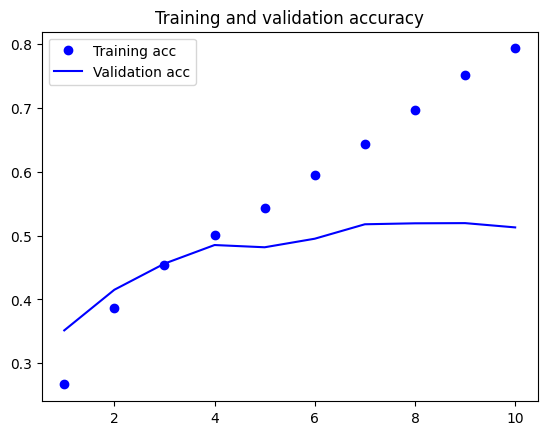

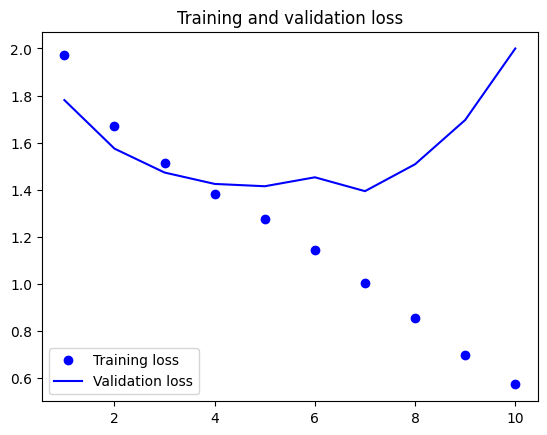

In [32]:
#Displaying curves of loss and accuracy

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()